# Table of Contents

01. Import Libraries
02. Import Dataframe
03. Addressing Data Security Implications in dataframe
04. Regional Segmentation of Data
05. Creating a exclusion flag for low-activity customer (number of orders < 5) and data exclusion
06. Customer profiling
07. Visualization to show the distribution of profiles
08. Aggregation of max, mean, and min variables on a customer-profile level for usage frequency and expenditure
09. Compare customer profiles with regions and departments
10. Key Questions

# 01. Import Libraries

In [237]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import Dataframe

In [243]:
# Create path

path = r'/Users/dianaalatriste/Documents/Instacart'

In [3]:
# Confirm path creation

path

'/Users/dianaalatriste/Documents/Instacart'

In [4]:
# Import dataframe 

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [5]:
# Check output

df.shape

(32404859, 31)

In [6]:
# Check columns in dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int64   
 1   user_id                object  
 2   order_number           int8    
 3   orders_day_of_week     int8    
 4   order_hour_of_day      int8    
 5   last_purchase          float16 
 6   product_id             int32   
 7   add_to_cart_order      int64   
 8   reordered              int8    
 9   product_name           object  
 10  department_id          int8    
 11  prices                 float32 
 12  price_range_loc        object  
 13  busiest_day            object  
 14  busiest_days           object  
 15  busiest_period_of_day  object  
 16  max_order              int8    
 17  loyalty_flag           object  
 18  average_expenses       float64 
 19  spending_flag          object  
 20  user_behaviour         float16 
 21  order_frequency_flag   object

# 03. Consider any security implications that might exist for this new data. 

### Address any PII data in the data before continuing analysis

In [7]:
# The current dataframe contains personal information including 'First name' and 'Surname'. 
# Therefore these columns will be dropped from the dataframe

df = df.drop(columns = ['First Name', 'Surname'], axis = 1)

In [8]:
# Check output

df.shape

(32404859, 29)

# 04. Create a regional segmentation of the data. Specifically, create a “Region” column based on the “State” column from the customers data set.

### Regions will be created based on the region information in this Wikipedia article: https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

### Create objects  as list of states that belong to each specific region:

In [9]:
# Define states that belong to the 'Northeast' Region

northeast_states = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [10]:
# Define states that belong to the 'Midwest' Region

midwest_states = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [11]:
# Define states that belong to the 'South' Region

south_states = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee','Mississippi','Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [12]:
# Define states that belong to the 'West' Region

west_states = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

### Create 'Region' column using the objects created above using .loc() function:

In [13]:
# Create condition for 'Northeast' region

df.loc[df['State'].isin(northeast_states), 'Region'] = 'Northeast'

In [14]:
# Create condition for 'Midwest' region

df.loc[df['State'].isin(midwest_states), 'Region'] = 'Midwest'

In [15]:
# Create condition for 'South' region

df.loc[df['State'].isin(south_states), 'Region'] = 'South'

In [16]:
# Create condition for 'West' region

df.loc[df['State'].isin(west_states), 'Region'] = 'West'

In [17]:
df.shape

(32404859, 30)

In [18]:
df.head(15)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_purchase,product_id,add_to_cart_order,reordered,product_name,...,user_behaviour,order_frequency_flag,Gender,State,Age,number_of_children,fam_status,income,_merge,Region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South


In [19]:
# Check frequency of values in newly created 'Region' column

df['Region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

## Determine whether there’s a difference in spending habits between the different U.S. regions.

### (Hint: You can do this by crossing the variable you just created with the spending flag)

In [20]:
# Create a crosstabulation between 'Region' and 'spending flag' variable

crosstab = pd.crosstab(df['Region'], df['spending_flag'], dropna = False)

In [21]:
# Print crosstab

print(crosstab)

spending_flag  High spender  Low spender
Region                                  
Midwest              155975      7441350
Northeast            108225      5614511
South                209691     10582194
West                 160354      8132559


### As numbers of each region are quite different between each other, is important to normalize the data to have a better overview and provide accurate analysis.

In [22]:
crosstab_regional = pd.crosstab(index = df['Region'], columns = df['spending_flag'], normalize = 'index')

In [23]:
# Create a second crosstab to use for adding labels to bar chart

crosstab_regional2 = pd.crosstab(index = df['Region'], columns = df['spending_flag'])

In [24]:
# Check outcome

crosstab_regional2

spending_flag,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


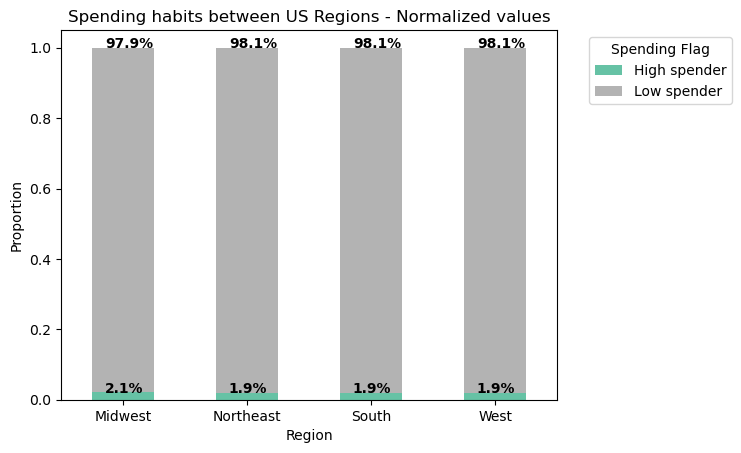

In [25]:
# Create bar chart

bar_norm_regional = crosstab_regional.plot(kind = 'bar', stacked = True, colormap = 'Set2')
plt.title('Spending habits between US Regions - Normalized values')
plt.legend(title='Spending Flag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Region')
plt.xticks(rotation = 0)
plt.ylabel('Proportion')

for n, x in enumerate([*crosstab_regional2.index.values]):
    for (proportion, y_loc) in zip (crosstab_regional.loc[x],
                                   crosstab_regional.loc[x].cumsum()):
        
        plt.text(x = n-0.15,
               y = y_loc,
               s = f'{np.round(proportion * 100, 1)}%',
               color = 'black',
               fontsize = 10,
               fontweight = 'bold')

### By plotting the spending patterns we see that there's no significant differences between High spenders and low spenders accross regions

In [26]:
# Export chart

bar_norm_regional.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Spending_pattern_regions_bar.png'), bbox_inches = 'tight')

# 05. Create an exclusion flag for low-activity customers (customers with < 5 orders) and exclude them from the data

### The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app.

In [27]:
# Create flag based on column 'max_order' previously created and therefore already present in dataframe
# Low activity flag

df.loc[df['max_order'] < 5, 'customer_activity'] = 'low activity'

In [28]:
# Regular activity

df.loc[df['max_order'] >= 5, 'customer_activity'] = 'regular activity'

In [29]:
# Check output

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_purchase,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,Gender,State,Age,number_of_children,fam_status,income,_merge,Region,customer_activity
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,regular activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,regular activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,regular activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,regular activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,regular activity


In [30]:
# Create dataframe that only includes 'low activity' customers

df2 = df[df['customer_activity'] == 'low activity']

In [31]:
# Check output of df2

df2.head(20)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_purchase,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,Gender,State,Age,number_of_children,fam_status,income,_merge,Region,customer_activity
1510,520620,120,1,3,11,NaN,196,2,0,Soda,...,Regular customer,Female,Kentucky,54,2,married,99219,both,South,low activity
1511,3273029,120,3,2,8,19.0,196,2,1,Soda,...,Regular customer,Female,Kentucky,54,2,married,99219,both,South,low activity
1512,520620,120,1,3,11,NaN,46149,1,0,Zero Calorie Cola,...,Regular customer,Female,Kentucky,54,2,married,99219,both,South,low activity
1513,3273029,120,3,2,8,19.0,46149,1,1,Zero Calorie Cola,...,Regular customer,Female,Kentucky,54,2,married,99219,both,South,low activity
1514,520620,120,1,3,11,NaN,26348,3,0,Mixed Fruit Fruit Snacks,...,Regular customer,Female,Kentucky,54,2,married,99219,both,South,low activity
1515,906054,120,2,4,7,15.0,31102,1,0,Sugar Free Energy Drink,...,Regular customer,Female,Kentucky,54,2,married,99219,both,South,low activity
1516,3273029,120,3,2,8,19.0,31102,3,1,Sugar Free Energy Drink,...,Regular customer,Female,Kentucky,54,2,married,99219,both,South,low activity
3855,3226575,360,1,5,12,NaN,196,1,0,Soda,...,Frequent customer,Male,Arizona,46,1,married,104257,both,West,low activity
3856,3046940,360,2,2,8,4.0,5322,3,0,Gluten Free Dark Chocolate Chunk Chewy with a ...,...,Frequent customer,Male,Arizona,46,1,married,104257,both,West,low activity
3857,2300993,360,3,1,13,6.0,5322,2,1,Gluten Free Dark Chocolate Chunk Chewy with a ...,...,Frequent customer,Male,Arizona,46,1,married,104257,both,West,low activity


In [32]:
# Check shape of df

df.shape

(32404859, 31)

In [33]:
# Check shape of df2

df2.shape

(1440295, 31)

In [34]:
# Export 'low activity' dataframe

df2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_users.pkl'))

### Remove df2 (low activity customers) from df (full dataframe)

In [35]:
# Remove low activity users from dataframe df

df_all = df[df['customer_activity'] == 'regular activity']

In [36]:
# Check shape of newly created dataframe 'df_all'

df_all.shape

(30964564, 31)

In [37]:
# Double check newly created df_all

df_all.head(20)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_purchase,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,Gender,State,Age,number_of_children,fam_status,income,_merge,Region,customer_activity
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,regular activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,regular activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,regular activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,regular activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,regular activity
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,regular activity
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,regular activity
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,regular activity
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,regular activity
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,regular activity


# 06. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

## 6.1 Creating profiles based on customer's income

Four categories will be created:

1. Low-income (25,000 - 49,999 USD)
2. Middle-income (50,000 - 74, 999 USD)
3. High-income (75,000 - 149, 999 USD)
4. Affluent ( > 150, 000 USD)

In [38]:
# Create 'low-income' group

df_all.loc[(df_all['income'] > 25000) & (df_all['income'] <= 49999), 'income_group'] = 'Low-Income'

/var/folders/pp/r24xg_5d3x54jxxzxmjgr2z00000gn/T/ipykernel_164/1537475338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all.loc[(df_all['income'] > 25000) & (df_all['income'] <= 49999), 'income_group'] = 'Low-Income'


In [39]:
# Create 'middle-income' group

df_all.loc[(df_all['income'] >= 50000) & (df_all['income'] <= 74999), 'income_group'] = 'Middle-income'

In [40]:
# Create 'high-income' group

df_all.loc[(df_all['income'] >= 75000) & (df_all['income'] <= 149999), 'income_group'] = 'High-income'

In [41]:
# Create 'affluent' group

df_all.loc[df_all['income'] >= 150000, 'income_group'] = 'Affluent'

In [42]:
# Check outcome

df_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_purchase,product_id,add_to_cart_order,reordered,product_name,...,Gender,State,Age,number_of_children,fam_status,income,_merge,Region,customer_activity,income_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,3,married,40423,both,South,regular activity,Low-Income
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,3,married,40423,both,South,regular activity,Low-Income
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,3,married,40423,both,South,regular activity,Low-Income
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,3,married,40423,both,South,regular activity,Low-Income
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,3,married,40423,both,South,regular activity,Low-Income


In [43]:
# Check for frequency of values in 'income_group'

df_all['income_group'].value_counts(dropna = False)

High-income      17162609
Middle-income     6544126
Affluent          3895275
Low-Income        3362554
Name: income_group, dtype: int64

## 6.2 Creating profiles based on customer's age

For this, three categories will be created

1. Young Adult (<= 30)
2. Middle age (31 - 64)
3. Senior (>=65)

In [44]:
# Create 'Young adult' group

df_all.loc[df_all['Age'] <= 30, 'age_group'] = 'Young Adult'

/var/folders/pp/r24xg_5d3x54jxxzxmjgr2z00000gn/T/ipykernel_164/2170386316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all.loc[df_all['Age'] <= 30, 'age_group'] = 'Young Adult'


In [45]:
# Create 'Middle Age' group

df_all.loc[(df_all['Age'] > 30) & (df_all['Age'] <= 64), 'age_group'] = 'Middle Aged Adult'

In [46]:
# Create 'Senior' group

df_all.loc[df_all['Age'] >= 65, 'age_group'] = 'Senior'

In [47]:
# Check outcome of age_group grouping

df_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_purchase,product_id,add_to_cart_order,reordered,product_name,...,State,Age,number_of_children,fam_status,income,_merge,Region,customer_activity,income_group,age_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,3,married,40423,both,South,regular activity,Low-Income,Middle Aged Adult
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,3,married,40423,both,South,regular activity,Low-Income,Middle Aged Adult
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,3,married,40423,both,South,regular activity,Low-Income,Middle Aged Adult
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,3,married,40423,both,South,regular activity,Low-Income,Middle Aged Adult
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,3,married,40423,both,South,regular activity,Low-Income,Middle Aged Adult


In [48]:
#Check frequency of values in 'age_group' column

df_all['age_group'].value_counts(dropna = False)

Middle Aged Adult    16464780
Senior                8195544
Young Adult           6304240
Name: age_group, dtype: int64

## 6.3 Creatings groups based on number of dependants/children

Two categories will be created 

1. No children, where number of children = 0
2. Has children, where number of children > 0

In [49]:
# Create 'No children' group

df_all.loc[df_all['number_of_children'] == 0, 'children_flag'] = 'No children'

/var/folders/pp/r24xg_5d3x54jxxzxmjgr2z00000gn/T/ipykernel_164/270316265.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all.loc[df_all['number_of_children'] == 0, 'children_flag'] = 'No children'


In [50]:
# Create 'Has children' group

df_all.loc[df_all['number_of_children'] > 0, 'children_flag'] = 'Has children'

In [51]:
# Check outcome

df_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_purchase,product_id,add_to_cart_order,reordered,product_name,...,Age,number_of_children,fam_status,income,_merge,Region,customer_activity,income_group,age_group,children_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,31,3,married,40423,both,South,regular activity,Low-Income,Middle Aged Adult,Has children
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,31,3,married,40423,both,South,regular activity,Low-Income,Middle Aged Adult,Has children
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,31,3,married,40423,both,South,regular activity,Low-Income,Middle Aged Adult,Has children
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,31,3,married,40423,both,South,regular activity,Low-Income,Middle Aged Adult,Has children
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,3,married,40423,both,South,regular activity,Low-Income,Middle Aged Adult,Has children


In [52]:
# Check frequency of values in 'children_flag' column

df_all['children_flag'].value_counts(dropna = False)

Has children    23224883
No children      7739681
Name: children_flag, dtype: int64

## 6.4 Creatings customer profiles

Profiling will be done based on the previous groups created and also using the column 'fam_status'

The profiles created will be the following:

1. Young Adult no children
2. Young Adult Parent 
4. Middle Aged no children
5. Middle Aged Parent
6. Senior no children
7. Senior Parent

In [53]:
# Create profile 'Young adult no children'

df_all.loc[(df_all['age_group'] == 'Young Adult') & (df_all['children_flag'] == 'No children'), 'customer_profile'] = 'Young Adult no children'

/var/folders/pp/r24xg_5d3x54jxxzxmjgr2z00000gn/T/ipykernel_164/1836757135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all.loc[(df_all['age_group'] == 'Young Adult') & (df_all['children_flag'] == 'No children'), 'customer_profile'] = 'Young Adult no children'


In [54]:
# Create profile 'Young adult Parent'

df_all.loc[(df_all['age_group'] == 'Young Adult') & (df_all['children_flag'] == 'Has children'), 'customer_profile'] = 'Young Adult Parent'

In [55]:
# Create profile 'Middle Aged no children'

df_all.loc[(df_all['age_group'] == 'Middle Aged Adult') & (df_all['children_flag'] == 'No children'), 'customer_profile'] = 'Middle Aged no children'

In [56]:
# Create profile 'Middle Aged Parent'

df_all.loc[(df_all['age_group'] == 'Middle Aged Adult') & (df_all['children_flag'] == 'Has children'), 'customer_profile'] = 'Middle Aged Parent'

In [57]:
# Create profile 'Senior no children'

df_all.loc[(df_all['age_group'] == 'Senior') & (df_all['children_flag'] == 'No children'), 'customer_profile'] = 'Senior no children'

In [58]:
# Create profile 'Senior Parent'

df_all.loc[(df_all['age_group'] == 'Senior') & (df_all['children_flag'] == 'Has children'), 'customer_profile'] = 'Senior Parent'

In [59]:
# Check outcome

df_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_purchase,product_id,add_to_cart_order,reordered,product_name,...,number_of_children,fam_status,income,_merge,Region,customer_activity,income_group,age_group,children_flag,customer_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,3,married,40423,both,South,regular activity,Low-Income,Middle Aged Adult,Has children,Middle Aged Parent
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,3,married,40423,both,South,regular activity,Low-Income,Middle Aged Adult,Has children,Middle Aged Parent
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,3,married,40423,both,South,regular activity,Low-Income,Middle Aged Adult,Has children,Middle Aged Parent
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,3,married,40423,both,South,regular activity,Low-Income,Middle Aged Adult,Has children,Middle Aged Parent
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,3,married,40423,both,South,regular activity,Low-Income,Middle Aged Adult,Has children,Middle Aged Parent


In [60]:
# Double check outcome

df_all.shape

(30964564, 35)

In [61]:
# Check frequency of  values in 'customer_profile' column

df_all['customer_profile'].value_counts(dropna = False)

Middle Aged Parent         12320429
Senior Parent               6173586
Young Adult Parent          4730868
Middle Aged no children     4144351
Senior no children          2021958
Young Adult no children     1573372
Name: customer_profile, dtype: int64

### Include Department name in main dataframe by merging it with 'departments wrangled' dataframe

In [62]:
df_deps = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [63]:
# Check output

df_deps.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [64]:
# Solve column naming issue

df_deps = df_deps.rename(columns={'Unnamed: 0': 'department_id'})

In [65]:
# Check renaming of column

df_deps.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [66]:
# Merge with main dataframe

df_merged = df_deps.merge(df_all, on = 'department_id')

In [85]:
# Check output

df_merged.head(50)

,department_id,department,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_purchase,product_id,add_to_cart_order,...,number_of_children,fam_status,income,_merge,Region,customer_activity,income_group,age_group,children_flag,customer_profile
0,1,frozen,2293453,19,2,5,14,6.0,41319,22,...,1,married,151988,both,South,regular activity,Affluent,Middle Aged Adult,Has children,Middle Aged Parent
1,1,frozen,86918,19,9,5,16,8.0,9076,17,...,1,married,151988,both,South,regular activity,Affluent,Middle Aged Adult,Has children,Middle Aged Parent
2,1,frozen,1321974,19,1,6,13,NaN,18174,2,...,1,married,151988,both,South,regular activity,Affluent,Middle Aged Adult,Has children,Middle Aged Parent
3,1,frozen,2293453,19,2,5,14,6.0,18174,9,...,1,married,151988,both,South,regular activity,Affluent,Middle Aged Adult,Has children,Middle Aged Parent
4,1,frozen,2808909,19,4,5,12,5.0,18174,15,...,1,married,151988,both,South,regular activity,Affluent,Middle Aged Adult,Has children,Middle Aged Parent
5,1,frozen,1973799,19,5,6,12,8.0,18174,18,...,1,married,151988,both,South,regular activity,Affluent,Middle Aged Adult,Has children,Middle Aged Parent
6,1,frozen,1321974,19,1,6,13,NaN,33756,17,...,1,married,151988,both,South,regular activity,Affluent,Middle Aged Adult,Has children,Middle Aged Parent
7,1,frozen,2293453,19,2,5,14,6.0,33756,5,...,1,married,151988,both,South,regular activity,Affluent,Middle Aged Adult,Has children,Middle Aged Parent
8,1,frozen,2808909,19,4,5,12,5.0,33756,26,...,1,married,151988,both,South,regular activity,Affluent,Middle Aged Adult,Has children,Middle Aged Parent
9,1,frozen,1321974,19,1,6,13,NaN,35123,21,...,1,married,151988,both,South,regular activity,Affluent,Middle Aged Adult,Has children,Middle Aged Parent


In [86]:
# Check frequency of values in department column

df_merged['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

### Include income grouping into customer profiles and add most buy department per customer

In [87]:
# Group dataset by customer profile and aggregate "department_id" column using mode

df3 = df_merged.groupby(['user_id', 'Region', 'customer_profile', 'income_group', 'spending_flag']).agg({'department':pd.Series.mode}).reset_index()

In [88]:
# Check outcome

df3.head(50)

,user_id,Region,customer_profile,income_group,spending_flag,department
0,1,South,Middle Aged Parent,Low-Income,Low spender,snacks
1,10,South,Middle Aged Parent,Middle-income,Low spender,produce
2,100,South,Middle Aged Parent,High-income,Low spender,produce
3,1000,South,Young Adult Parent,Middle-income,Low spender,produce
4,10000,South,Middle Aged no children,Middle-income,Low spender,produce
5,100000,Northeast,Middle Aged Parent,High-income,Low spender,produce
6,100001,South,Middle Aged Parent,High-income,Low spender,produce
7,100002,Midwest,Young Adult no children,Low-Income,Low spender,dairy eggs
8,100004,South,Middle Aged Parent,Low-Income,Low spender,babies
9,100005,West,Middle Aged Parent,High-income,Low spender,household


In [89]:
df3.sort_values(by ='user_id', ascending= True, inplace = True)

In [90]:
df3.head(20)

,user_id,Region,customer_profile,income_group,spending_flag,department
0,1,South,Middle Aged Parent,Low-Income,Low spender,snacks
1,10,South,Middle Aged Parent,Middle-income,Low spender,produce
2,100,South,Middle Aged Parent,High-income,Low spender,produce
3,1000,South,Young Adult Parent,Middle-income,Low spender,produce
4,10000,South,Middle Aged no children,Middle-income,Low spender,produce
5,100000,Northeast,Middle Aged Parent,High-income,Low spender,produce
6,100001,South,Middle Aged Parent,High-income,Low spender,produce
7,100002,Midwest,Young Adult no children,Low-Income,Low spender,dairy eggs
8,100004,South,Middle Aged Parent,Low-Income,Low spender,babies
9,100005,West,Middle Aged Parent,High-income,Low spender,household


In [91]:
# Double check

df3.shape

(162631, 6)

# 07. Create a visualization to show the distribution of profiles

To approach this, a crosstab will be generated first that will serve later as basis to create the corresponding graph(s)

In [92]:
# Create first crosstab of distribution of profiles


crosstab2 = pd.crosstab(df3['customer_profile'], df3['income_group'], dropna = False)

In [93]:
# Check outcome

crosstab2

income_group,Affluent,High-income,Low-Income,Middle-income
customer_profile,,,,
Middle Aged Parent,8261,34787,9722,11944
Middle Aged no children,2756,11681,3245,3979
Senior Parent,5724,20156,3980,2687
Senior no children,1958,6569,1298,878
Young Adult Parent,167,8778,5142,10556
Young Adult no children,47,2917,1805,3594


Results will be displayed in the form of a stacked bar chart

Text(0.5, 1.0, 'Distribution of Customer Profiles')

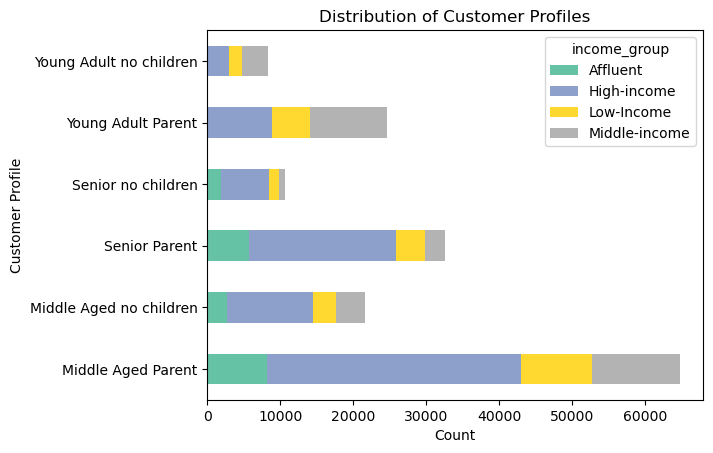

In [94]:
# Plot stacked chart

stacked_profiles = crosstab2.plot.barh(stacked = True, colormap = 'Set2')

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Customer Profile')
plt.title('Distribution of Customer Profiles')

In [95]:
# Export chart

stacked_profiles.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profiles_distribution.png'), bbox_inches = 'tight')

# 08. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [96]:
# Aggregating first max, mean and min by expenditure (prices)

df_all.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max']})

prices              
                              mean  min      max
customer_profile                                
Middle Aged Parent       11.939665  1.0  99999.0
Middle Aged no children  12.035826  1.0  99999.0
Senior Parent            11.675618  1.0  99999.0
Senior no children       12.008597  1.0  99999.0
Young Adult Parent       11.977368  1.0  99999.0
Young Adult no children  12.399571  1.0  99999.0

In [97]:
# Aggregating first max, mean and min by last purchase

df_all.groupby('customer_profile').agg({'last_purchase': ['mean', 'min', 'max']})

last_purchase           
                                 mean  min   max
customer_profile                                
Middle Aged Parent          10.830143  0.0  30.0
Middle Aged no children     10.744627  0.0  30.0
Senior Parent               10.799413  0.0  30.0
Senior no children          10.768514  0.0  30.0
Young Adult Parent          10.802853  0.0  30.0
Young Adult no children     10.946888  0.0  30.0

# 09. Compare customer profiles with regions and departments.

Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

## 09.1 Comparison by region

In [98]:
# Create a normalized crosstabulation that will be used for the comparison

crosstab_profile_reg = pd.crosstab(index = df_all['Region'],
                             columns = df_all['customer_profile'],
                             normalize = "index")

In [99]:
# Check output

crosstab_profile_reg

customer_profile,Middle Aged Parent,Middle Aged no children,Senior Parent,Senior no children,Young Adult Parent,Young Adult no children
Region,,,,,,
Midwest,0.399163,0.137422,0.197475,0.064736,0.152338,0.048866
Northeast,0.398502,0.126396,0.202385,0.069325,0.151253,0.052140
South,0.397031,0.134023,0.198884,0.063789,0.153682,0.052590
West,0.397412,0.135458,0.199683,0.065004,0.153077,0.049366


In [102]:
# Create crosstab to display data labels on plot (as seen in https://towardsdatascience.com/100-stacked-charts-in-python-6ca3e1962d2b)

crosstab_profile_reg_labels = pd.crosstab(index = df_merged['Region'],
                             columns = df_merged['customer_profile'])

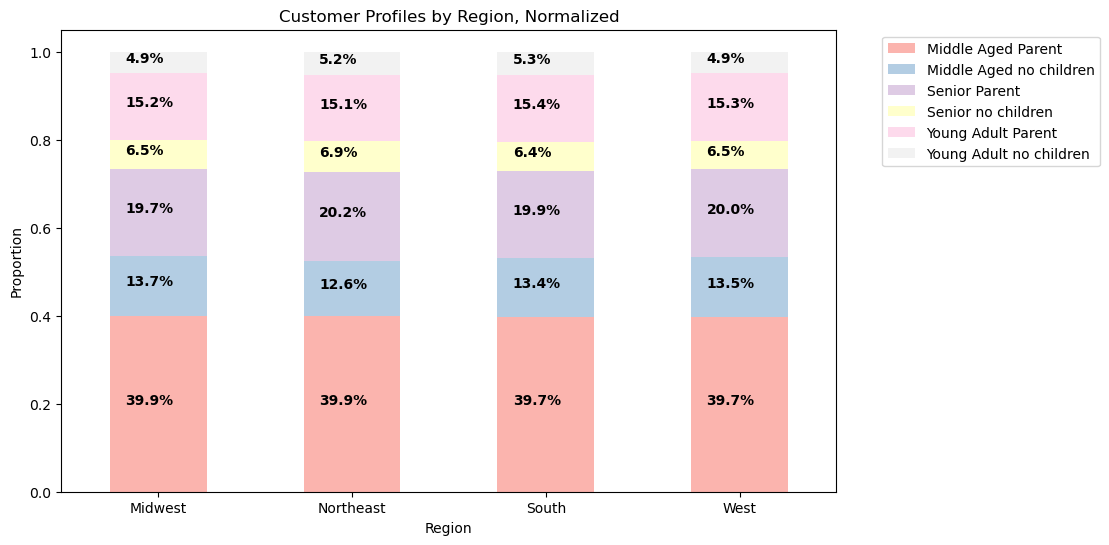

In [103]:
# Create stacked chart

bar_profile_reg = crosstab_profile_reg.plot(kind = 'bar',
                                           stacked = True,
                                           colormap = 'Pastel1',
                                           figsize = (10, 6))

plt.title('Customer Profiles by Region, Normalized')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Region")
plt.ylabel("Proportion")
plt.xticks(rotation = 0, fontsize=10)

# Create labels

for n, x in enumerate([*crosstab_profile_reg_labels.index.values]):
    for (proportion, y_loc) in zip(crosstab_profile_reg.loc[x],
                                   crosstab_profile_reg.loc[x].cumsum()):
                
        plt.text(x = n - 0.17,
                 y = (y_loc - proportion) + (proportion / 2),
                 s = f'{np.round(proportion * 100, 1)}%', 
                 color = "black",
                 fontsize = 10,
                 fontweight="bold")

Middle Age Parents constitute the biggest customers in all regions followed, by Senior Parents in second place and Young Adult Parents. The distribution of all profiles among regions is pretty similar and there is no profile that excels in numbers in any of the regions.

In [82]:
# Export chart

bar_profile_reg.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profiles_region.png'), bbox_inches = 'tight')

## 09.2 Compare profiles by department

In [104]:
# Create a normalized crosstabulation that will be used for the comparison

crosstab_profile_deps = pd.crosstab(index = df_merged['department'],
                             columns = df_merged['customer_profile'],
                             normalize = "index")

In [105]:
# Check output

crosstab_profile_deps

customer_profile,Middle Aged Parent,Middle Aged no children,Senior Parent,Senior no children,Young Adult Parent,Young Adult no children
department,,,,,,
alcohol,0.393122,0.142733,0.190518,0.063190,0.161726,0.048712
babies,0.402025,0.134335,0.195696,0.063091,0.150500,0.054353
bakery,0.397116,0.135736,0.199477,0.064611,0.152347,0.050713
beverages,0.397675,0.134476,0.200388,0.065571,0.151017,0.050872
breakfast,0.399141,0.134389,0.197973,0.063332,0.154795,0.050370
bulk,0.398135,0.126394,0.204807,0.062599,0.157903,0.050163
canned goods,0.397044,0.132879,0.200347,0.063971,0.154584,0.051176
dairy eggs,0.397620,0.134104,0.198809,0.065441,0.153555,0.050470
deli,0.396215,0.136624,0.199068,0.065118,0.152303,0.050672


In [106]:
# Create crosstab for graph labeling

crosstab_profile_deps_labels = pd.crosstab(index = df_merged['department'],
                             columns = df_merged['customer_profile'])

Text(0, 0.5, 'Proportion')

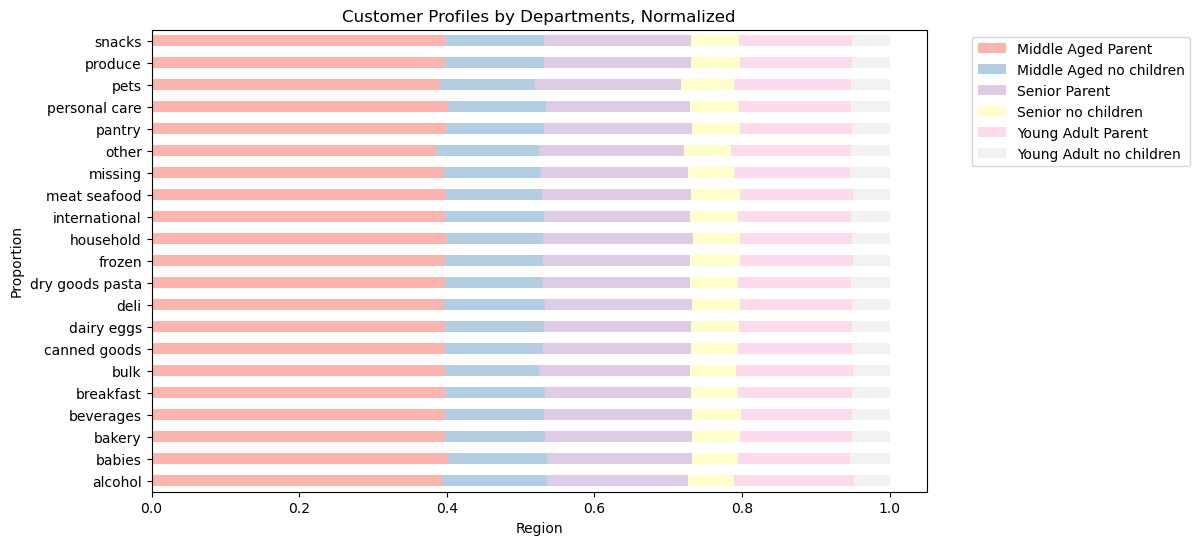

In [111]:
# Create stacked chart using recently created crosstabs

bar_profile_deps = crosstab_profile_deps.plot(kind = 'barh',
                                           stacked = True,
                                           colormap = 'Pastel1',
                                           figsize = (10, 6))

plt.title('Customer Profiles by Departments, Normalized')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Region")
plt.ylabel("Proportion")

Just like in the region comparison, the distribution of customer profiles remais quite consistent among departments meaning that there's no department that seems to be a favorite in a partiular customer profile. Middles Aged parents are the ones buying more consinstently throughout departments, followed by Senior Parents and Young Adult Parents. 

In [112]:
# Export chart

bar_profile_deps.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profiles_departments.png'), bbox_inches = 'tight')

# KEY QUESTIONS

## KQ1. What are the days and times with most orders?

The goal is to schedule ads at times when there are fewer orders

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

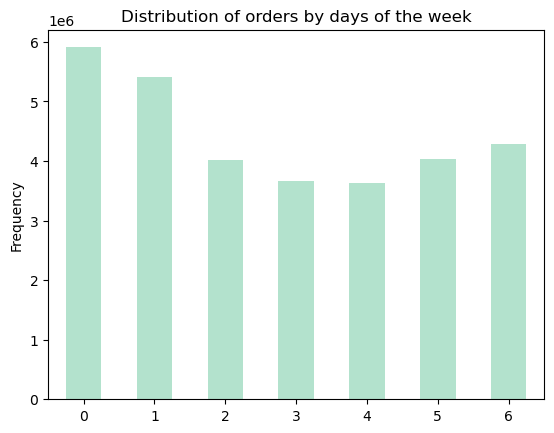

In [120]:
# Create bar chart of 'orders_day_of_week' to observe distribution among categories of the variable

bar = df_merged['orders_day_of_week'].value_counts().sort_index().plot.bar(colormap = 'Pastel2')

# Create labels

plt.title('Distribution of orders by days of the week')
plt.ylabel("Frequency")
plt.xticks(rotation = 0)

Based on the results about, we conclude that Saturday and Sunday are the busiest days of the weeks in terms of orders. I will proceed to calculate the busiest hours of the day for these two days

In [125]:
# Export bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Orders_days_week.png'))

In [121]:
# Create subset of Saturday and Sunday

SaSun = df_all[df_all['orders_day_of_week'].isin([0,1])]

Text(0, 0.5, 'Frequency')

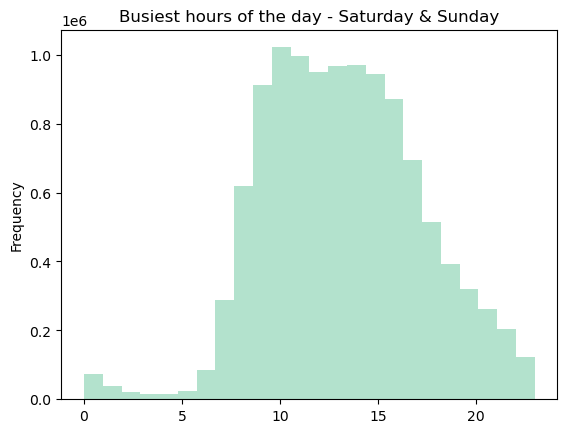

In [123]:
# Create histogram using subset

SaSunHist = SaSun['order_hour_of_day'].plot.hist(bins = 24,
                                                colormap = 'Pastel2')

# Create labels

plt.title('Busiest hours of the day - Saturday & Sunday')
plt.ylabel("Frequency")

Less busy hours span from 0 to 6 am. Considering that most of customers are sleeping at that time, the recommendation is then to schedule ads in the seconds less busy hours, so, 7 am, 8 pm and 9 pm. 

In [127]:
# Export histogram

SaSunHist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'SaSun_busiest_hours.png'))

## KQ2. Are there particular times of the day where people spend more money?

This was covered as part of the course and as the whole process was done by creating a subset, I will use the graph that I produced back then. 

### Identify which products are more popular at 2 am

In [204]:
# Create a subset of products bought at 2 am

data_at_2am = df_merged[df_merged['order_hour_of_day'] == 2]

In [205]:
# Creata a crosstab of product_name and the count of occurrences at 2 am

crosstab_2am = pd.crosstab(data_at_2am['product_name'], columns = 'count')

In [239]:
crosstab_2am

col_0,count
product_name,
#2 Coffee Filters,4
0% Fat Blueberry Greek Yogurt,2
0% Fat Free Organic Milk,4
0% Fat Organic Greek Vanilla Yogurt,3
0% Fat Strawberry Greek Yogurt,3
...,...
with Crispy Almonds Cereal,7
with Dawn Action Pacs Fresh Scent Dishwasher Detergent Pacs,1
with Olive Oil Mayonnaise,1


Text(0.5, 1.0, 'Top 10 Products Bought at 2 AM')

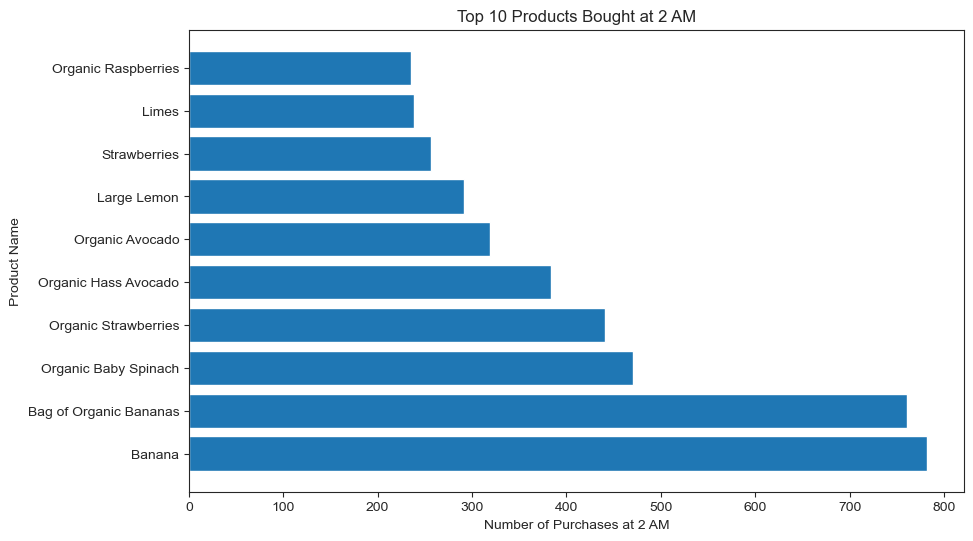

In [250]:
# Create plot

plt.figure(figsize=(10, 6))
top10products_2am = plt.barh(top_10_products_at_2am.index, top_10_products_at_2am['count'])



# Create plot labels

plt.xlabel('Number of Purchases at 2 AM')
plt.ylabel('Product Name')
plt.title('Top 10 Products Bought at 2 AM')




In [251]:
# Export this chart

top10products_2am.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Top10prods_2am.png'))

AttributeError: 'BarContainer' object has no attribute 'figure'

## * THE ABOVE CODE SAVES AN EMPTY IMAGE. CAN'T IDENTIFY THE PROBLEM HERE *

## KQ3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

Back in exercise 4.7 products were sorted into prices ranges. The applied criteria was as follows:

- If the item’s price was lower than or equal to 5 USD, item was labeled as 'low-range product'.
- If the item’s price was above 5 USD but lower than or equal to 15 USD, item was labeled as 'mid-range product'.
- If the item’s price was above 15 USD, item was labeled as 'high-range product'.

Check Script '4.7 Deriving New Variables' on the Instacart Folder

Text(0.5, 1.0, 'Products Price range')

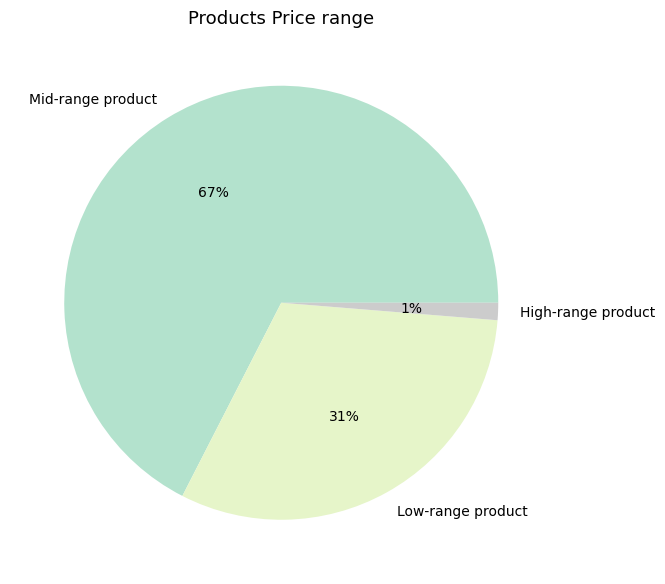

In [132]:
#Pie chart of the percentage of price ranges among product

pricerangepie = df_all['price_range_loc'].value_counts().plot.pie(figsize = (7,8), colormap = 'Pastel2', autopct='%1.0f%%')


plt.ylabel('')
plt.title('Products Price range',fontsize=13)


In [134]:
# Export pir chart

pricerangepie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Price_range_pie.png'), bbox_inches = 'tight')

## KQ4. Are there certain types of products that are more popular than others?

### The marketing and sales teams want to know which departments have the highest frequency of product orders.

Text(0.5, 1.0, 'Top 10 Departments (Based on number of orders)')

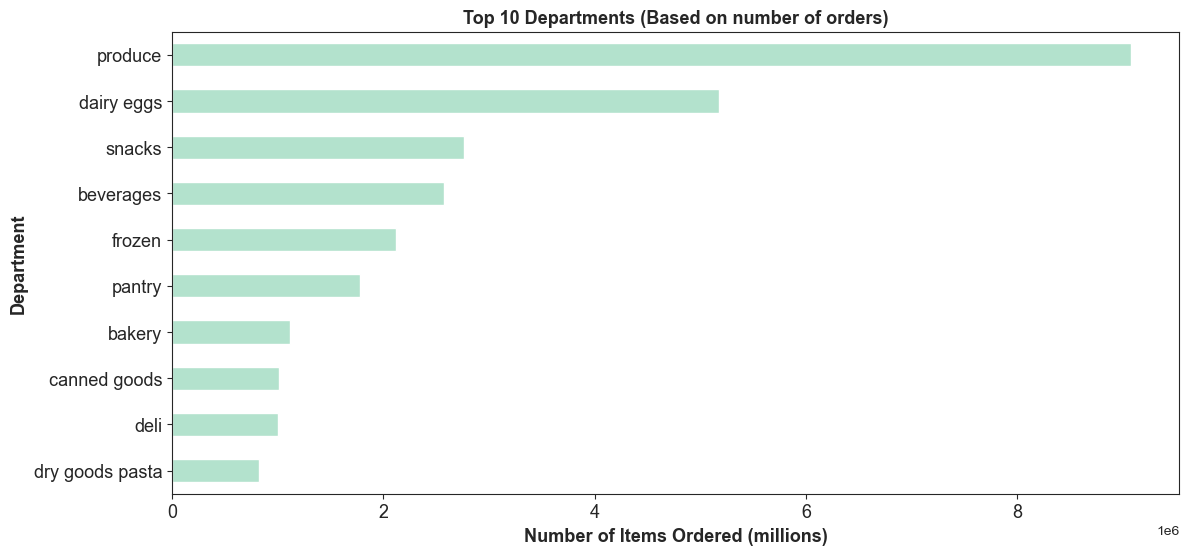

In [140]:
#Creating a bar chart of Top 10 departments

top_10_depts = df_merged['department'].value_counts().nlargest(10).sort_values(ascending = True).plot.barh(figsize = (13,6), colormap = 'Pastel2')

sns.set_style('ticks')
plt.xlabel('Number of Items Ordered (millions)', fontsize = 13, fontweight = 'bold')
plt.ylabel('Department', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Top 10 Departments (Based on number of orders)', fontsize = 13, fontweight = 'bold')



In [141]:
# Export graph

top_10_depts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Top_10_departments.png'), bbox_inches = 'tight')

## KQ5.1 What's the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

Text(0.5, 1.0, 'Distribution of Customers per Loyalty Flag')

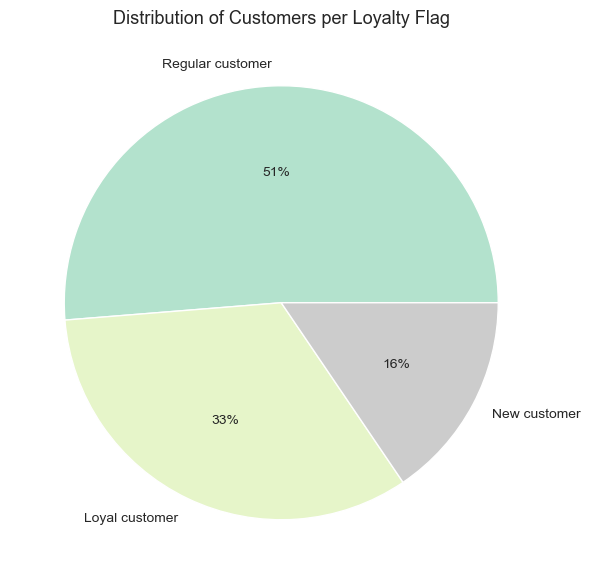

In [142]:
#Pie chart of the percentage of loyalty_flag among product

loyaltypie = df_all['loyalty_flag'].value_counts().plot.pie(figsize = (7,8), colormap = 'Pastel2', autopct='%1.0f%%')


plt.ylabel('')
plt.title('Distribution of Customers per Loyalty Flag',fontsize=13)


In [143]:
# Export pie chart

loyaltypie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_pie.png'), bbox_inches = 'tight')

## KQ5.2 Are there differences in ordering habits based on a customer's loyalty status?

In [144]:
# Create crosstab to minimize dataframe

crosstab_loyalty_dow = pd.crosstab(index = df_all['orders_day_of_week'], columns = df_all['loyalty_flag'])

Text(0, 0.5, 'Proportion of Orders')

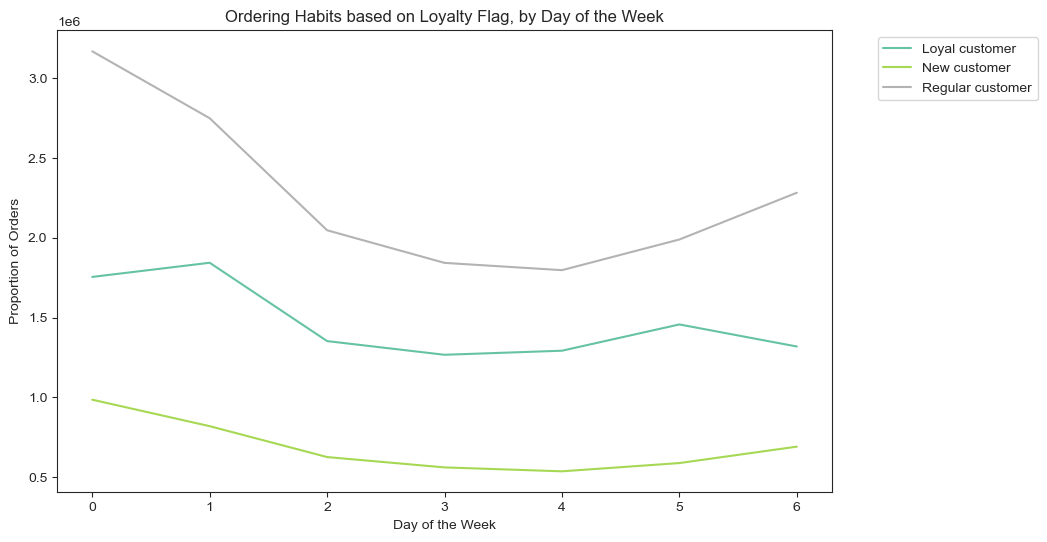

In [149]:
#Create plot

loyalty_line_plot = crosstab_loyalty_dow.plot(kind ='line', 
                        colormap ='Set2', 
                        figsize = (10, 6))

plt.title('Ordering Habits based on Loyalty Flag, by Day of the Week')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
plt.xlabel("Day of the Week")
plt.ylabel("Proportion of Orders")

In [150]:
# Export line graph

loyalty_line_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_order_habits.png'), bbox_inches = 'tight')

## KQ5.3 Are there differences in ordering habits based on a customer's region?

In [148]:
# Start by creating crosstab between 'Region' and 'Orders_day_of_week'

crosstab_loyalty_reg = pd.crosstab(index = df_all['orders_day_of_week'], columns = df_all['Region'])

Text(0, 0.5, 'Proportion of Orders')

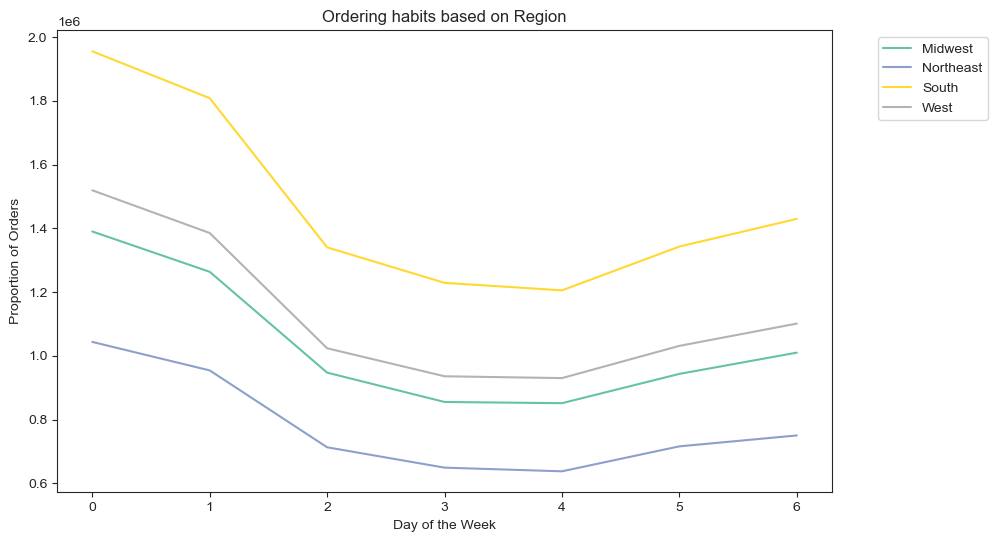

In [152]:
# Create line chart

regional_loyalty_plot = crosstab_loyalty_reg.plot(kind = 'line', 
                                                  colormap = 'Set2',
                                                 figsize = (10, 6))

plt.title('Ordering habits based on Region')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
plt.xlabel("Day of the Week")
plt.ylabel("Proportion of Orders")

In [153]:
# Export chart

regional_loyalty_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_order_habits.png'), bbox_inches = 'tight')

Text(0.5, 1.0, 'Distribution of Customers per Region')

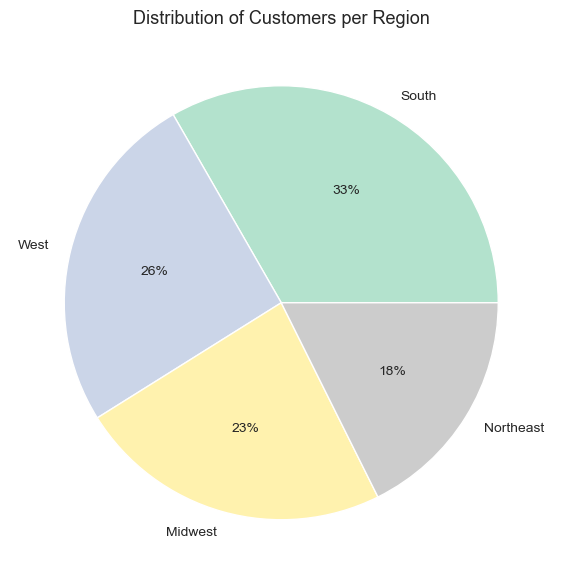

In [254]:
# Create pie chart of 'region' distribution

regionpie = df_all['Region'].value_counts().plot.pie(figsize = (7,8), colormap = 'Pastel2', autopct='%1.0f%%')


plt.ylabel('')
plt.title('Distribution of Customers per Region',fontsize=13)


In [255]:
# Export chart

regionpie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pieregion.png'), bbox_inches = 'tight')

## KQ5.4 Is there a connection between age and family status in terms of ordering habits?

In [154]:
# Calculate the average number of orders per family status and age group

average_orders = df_all.groupby(['fam_status', 'age_group'])['order_number'].mean().reset_index()

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0.0, 0, '0.0'),
  Text(2.5, 0, '2.5'),
  Text(5.0, 0, '5.0'),
  Text(7.5, 0, '7.5'),
  Text(10.0, 0, '10.0'),
  Text(12.5, 0, '12.5'),
  Text(15.0, 0, '15.0'),
  Text(17.5, 0, '17.5'),
  Text(20.0, 0, '20.0')])

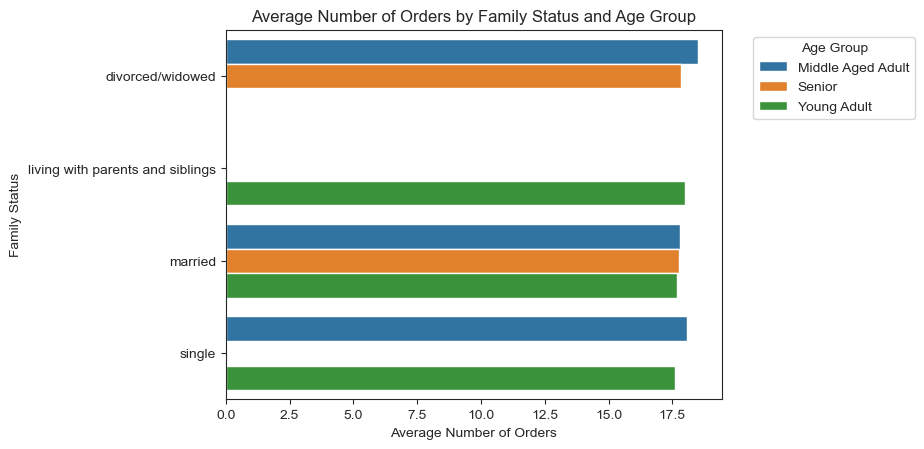

In [176]:
# Creating a bar plot

bar_age_familystatus = sns.barplot(x = 'order_number', y = 'fam_status', hue = 'age_group', data = average_orders, errorbar = 'sd', orient = 'h')

# Create labels for plot

plt.xlabel('Average Number of Orders')
plt.ylabel('Family Status')
plt.title('Average Number of Orders by Family Status and Age Group')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 0.5)


In [179]:
# Export graph

fig = bar_age_familystatus.get_figure()
fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_familystatus_habits.png'), bbox_inches='tight')

## KQ5.5 What different classifications does the demographic information suggest?
## Age? Income? Certain types of goods? Family status?

### AGE

Text(0.5, 1.0, 'Distribution of Age Groups')

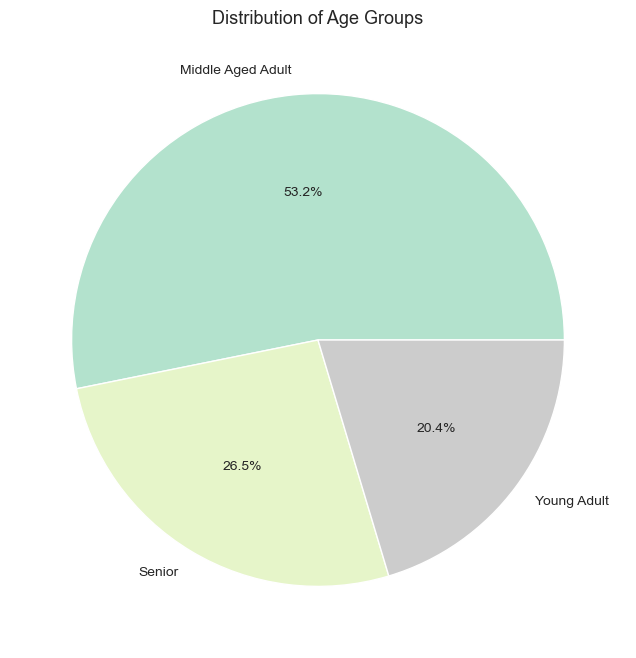

In [180]:
# Create a pie chart to visualize the distribution of age groups

pie_age_group = df_all['age_group'].value_counts().plot.pie(figsize = (8,8), 
                                                               colormap = 'Pastel2', 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Distribution of Age Groups', fontsize = 13)


In [181]:
# Export this pie chart

pie_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_age_groups.png'), bbox_inches = "tight")

### INCOME

Text(0.5, 1.0, 'Distribution of Income Groups')

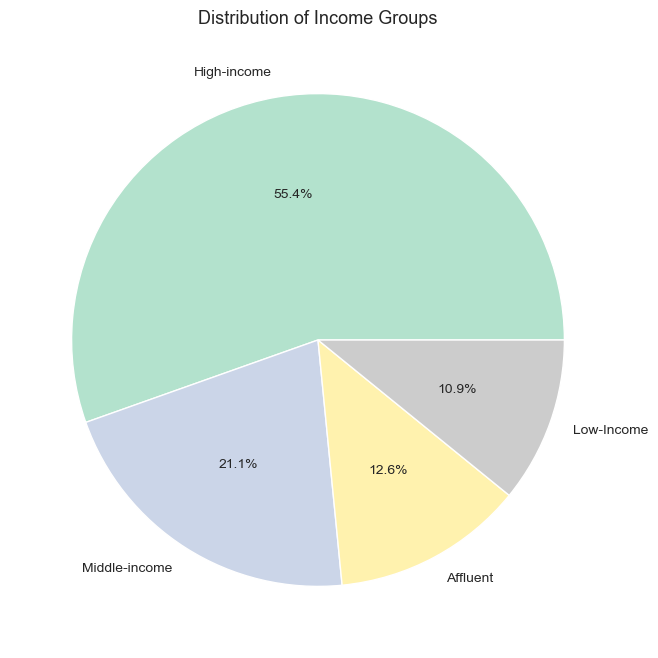

In [182]:
# Create a pie chart to visualize the distribution of income groups

pie_income_group = df_all['income_group'].value_counts().plot.pie(figsize = (8,8), 
                                                               colormap = 'Pastel2', 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Distribution of Income Groups', fontsize = 13)


In [183]:
# Export this pie chart

pie_income_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_income_groups.png'), bbox_inches = "tight")

### FAMILY STATUS

Text(0.5, 1.0, 'Distribution of Family Status Groups')

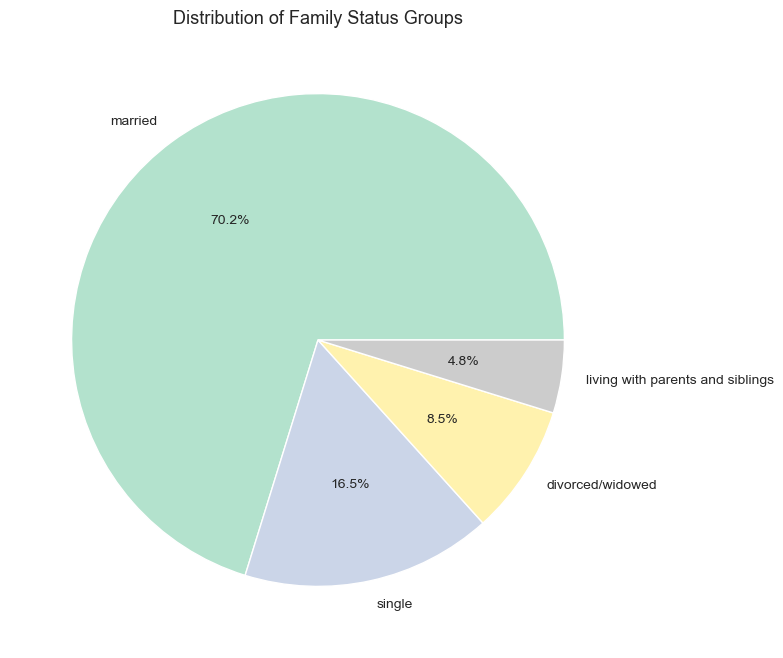

In [184]:
# Create a pie chart to visualize the distribution of family status groups

pie_familyst_group = df_all['fam_status'].value_counts().plot.pie(figsize = (8,8), 
                                                               colormap = 'Pastel2', 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Distribution of Family Status Groups', fontsize = 13)

In [203]:
# Export pie chart

pie_familyst_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_family_status.png'), bbox_inches = "tight")

## KQ5.6 What differences can you find in ordering habits of different customer profiles?

### Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.

In [185]:
# Create crosstab to minimize dataframe

crosstab_profiles_habits = pd.crosstab(index = df_all['orders_day_of_week'], columns = df_all['customer_profile'])

Text(0, 0.5, 'Proportion of Orders')

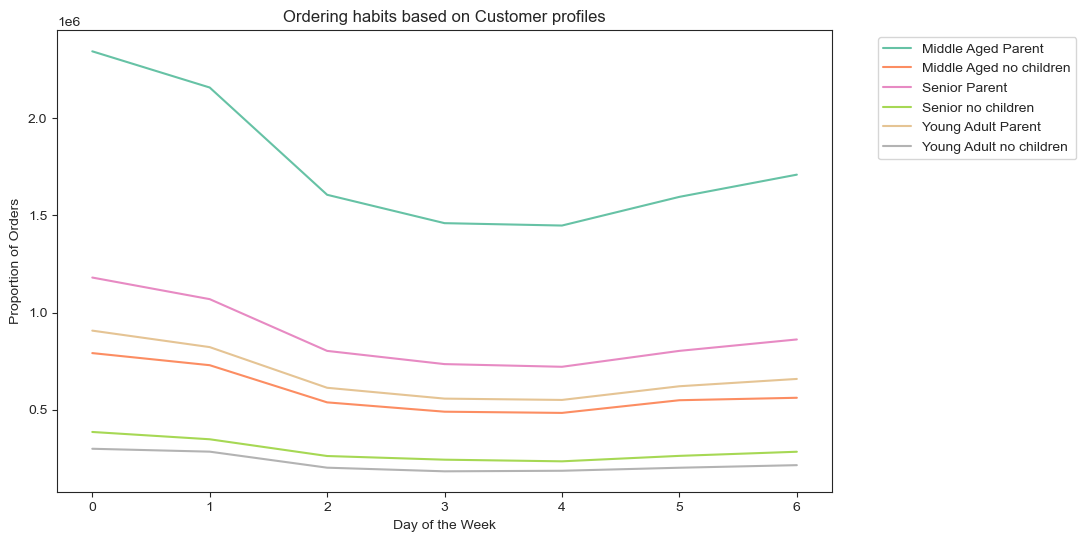

In [187]:
# Create line chart

profiles_habits_plot = crosstab_profiles_habits.plot(kind = 'line', 
                                                  colormap = 'Set2',
                                                 figsize = (10, 6))

plt.title('Ordering habits based on Customer profiles')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
plt.xlabel("Day of the Week")
plt.ylabel("Proportion of Orders")

In [188]:
# Export plot

profiles_habits_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_habits_ordersbydow.png'), bbox_inches = "tight")

I will try to also depict the results in a density map/heat map, based on what I saw in another alumni project. 

In [189]:
# Create crosstab

profile_deps = pd.crosstab(df_merged['customer_profile'], df_merged['department'])

Text(52.31597222222221, 0.5, 'User Profile')

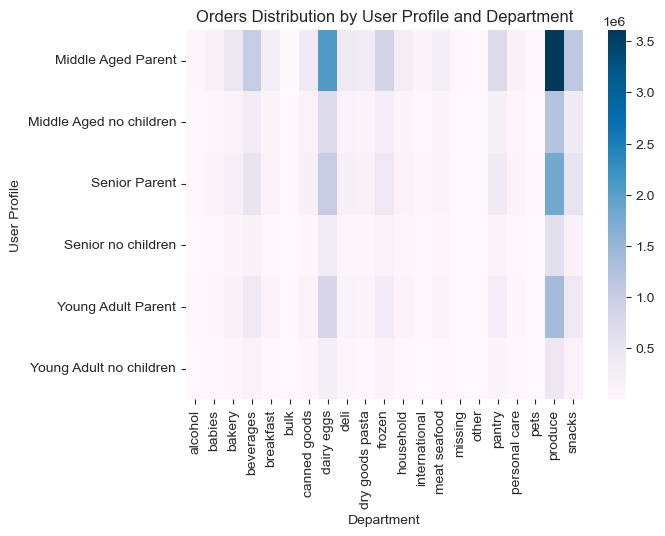

In [199]:
# Create heatmap

profile_deps_heatmap = sns.heatmap(profile_deps, cmap='PuBu')
 
# set labels and title

plt.title('Orders Distribution by User Profile and Department')
plt.xlabel('Department')
plt.ylabel('User Profile')

In [200]:
# Export graph

profile_deps_heatmap.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_habits_dep_heatmap.png'), bbox_inches = "tight")

# Export final dataframe

In [202]:
# Export the final dataframe

df_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all_final.pkl'))